## Importing Libraries

In [3]:
import pickle 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

## Loading the pre-processed X and y

In [ ]:
f = open('../phase1/X.pckl', 'rb')
X = pickle.load(f)
f.close()

f = open('../phase1/y.pckl', 'rb')
y = pickle.load(f)
f.close()

## Splitting dataset into train and test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((34518, 32), (34518,), (14794, 32), (14794,))

## Algorithm 1: Logistic Regression

In [6]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

## Evaluation Metrics: Algorithm 1

## a) Classification report

In [7]:
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7383
           1       0.95      0.88      0.91      7411

    accuracy                           0.91     14794
   macro avg       0.92      0.91      0.91     14794
weighted avg       0.92      0.91      0.91     14794



## b) Confusion Matrix

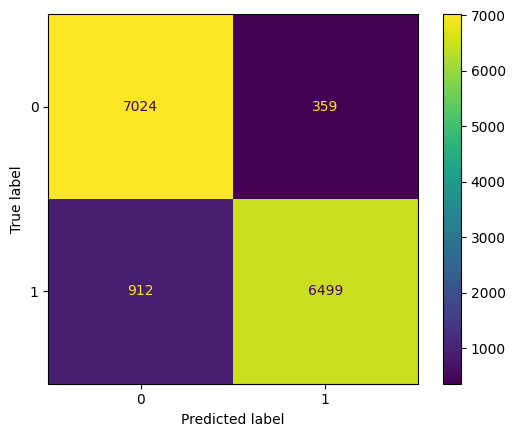

In [8]:
cm = confusion_matrix(y_test, y_pred,labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()

## c) ROC- Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.964


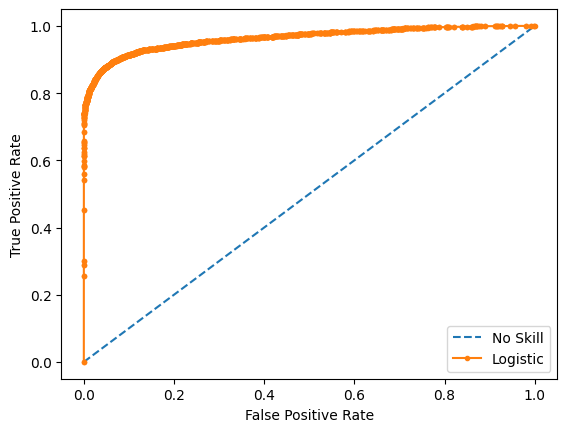

In [9]:
ns_probs = [0 for _ in range(len(y_test))]

probs = lr.predict_proba(X_test)
probs = probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

## Algorithm 2: Support Vector Machine (SVM)

In [10]:
svc = LinearSVC()
svc.fit(X_train,y_train)

C:\Users\abhip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\abhip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

## Evaluation Metrics: Algorithm 2

## a) Classification Report

In [11]:
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7383
           1       0.95      0.87      0.91      7411

    accuracy                           0.91     14794
   macro avg       0.92      0.91      0.91     14794
weighted avg       0.92      0.91      0.91     14794



## b) Confusion Matrix

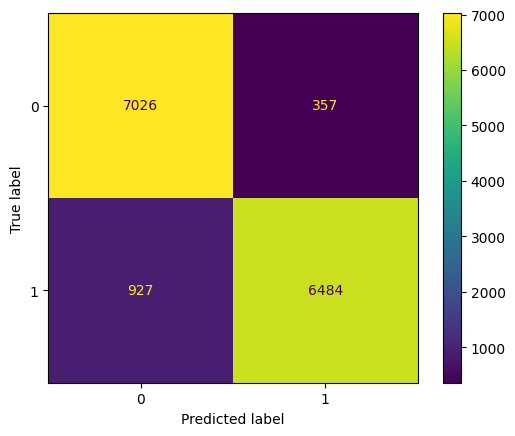

In [12]:
cm = confusion_matrix(y_test, y_pred,labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot()

## Algorithm 3: Naive Bayes Classifier (Guassian)

## a) Classification Report

In [13]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      7383
           1       0.86      0.84      0.85      7411

    accuracy                           0.85     14794
   macro avg       0.85      0.85      0.85     14794
weighted avg       0.85      0.85      0.85     14794



## b) Confusion Matrix

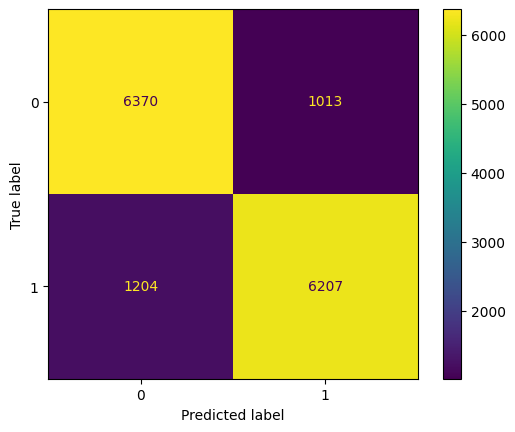

In [14]:
cm = confusion_matrix(y_test, y_pred,labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()

## c) ROC Curve

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.902


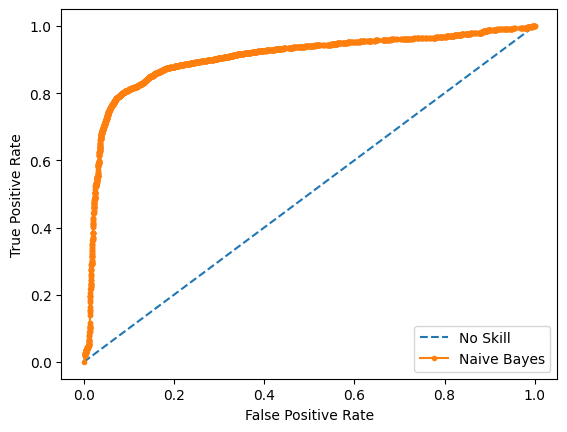

In [15]:
ns_probs = [0 for _ in range(len(y_test))]

probs = gnb.predict_proba(X_test)
probs = probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

## Algorithm 4: Decision Tree Classifier

In [16]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

## a) Classification Report

In [17]:
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7383
           1       0.92      0.93      0.92      7411

    accuracy                           0.92     14794
   macro avg       0.92      0.92      0.92     14794
weighted avg       0.92      0.92      0.92     14794



## b) Confusion Matrix

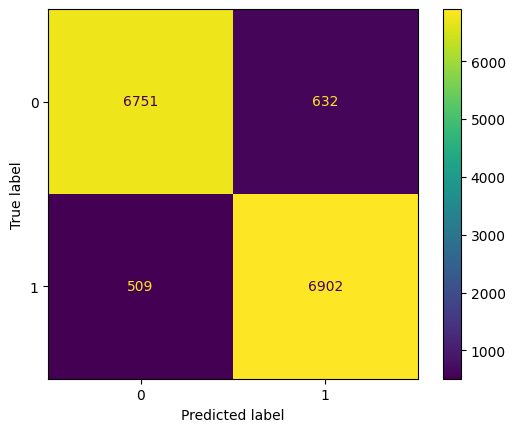

In [18]:
cm = confusion_matrix(y_test, y_pred,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()

## c) ROC Curve

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.923


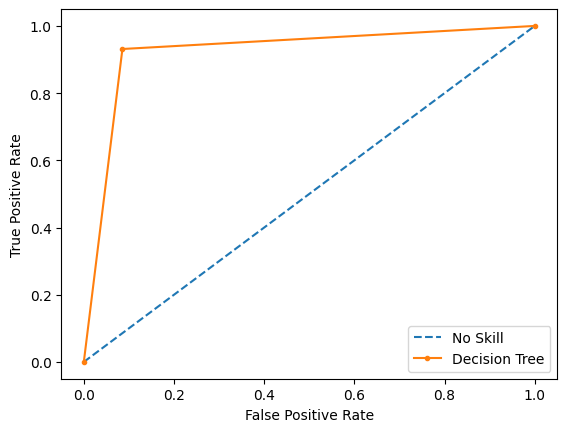

In [19]:
ns_probs = [0 for _ in range(len(y_test))]

probs = dt.predict_proba(X_test)
probs = probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

## Algorithm 5: Random Forest Classifier

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

## a) Classification Report

In [21]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7383
           1       0.99      0.92      0.95      7411

    accuracy                           0.95     14794
   macro avg       0.96      0.95      0.95     14794
weighted avg       0.96      0.95      0.95     14794



## b) Confusion Matrix

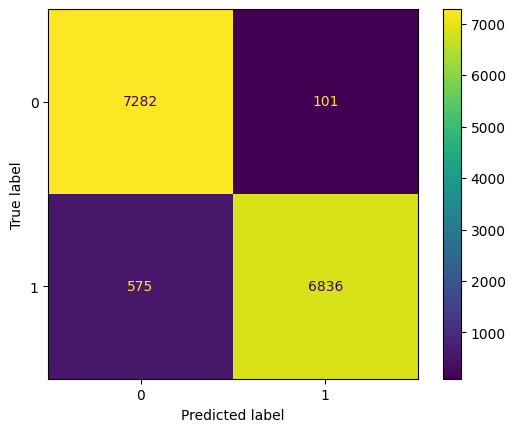

In [22]:
cm = confusion_matrix(y_test, y_pred,labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()

## c) ROC Curve

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.982


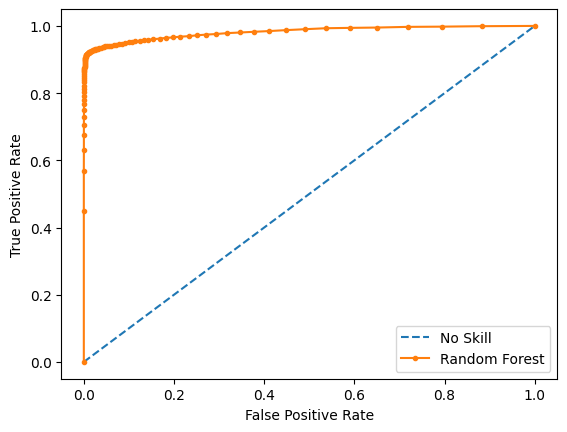

In [23]:
ns_probs = [0 for _ in range(len(y_test))]

probs = rf.predict_proba(X_test)
probs = probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

## Algorithm 6: KNN

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## a) Classification Report

In [25]:
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7383
           1       0.95      0.89      0.92      7411

    accuracy                           0.92     14794
   macro avg       0.93      0.92      0.92     14794
weighted avg       0.93      0.92      0.92     14794



## b) Confusion Matrix

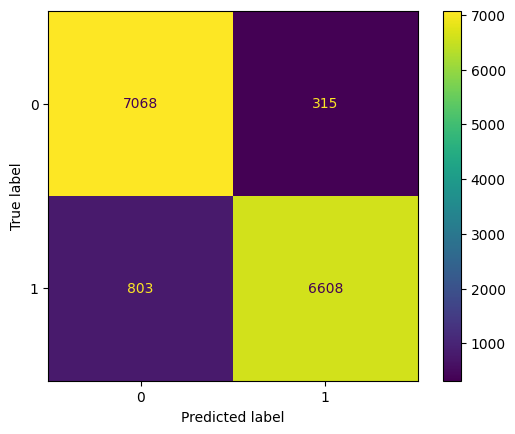

In [26]:
cm = confusion_matrix(y_test, y_pred,labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()

## c) ROC Curve

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.952


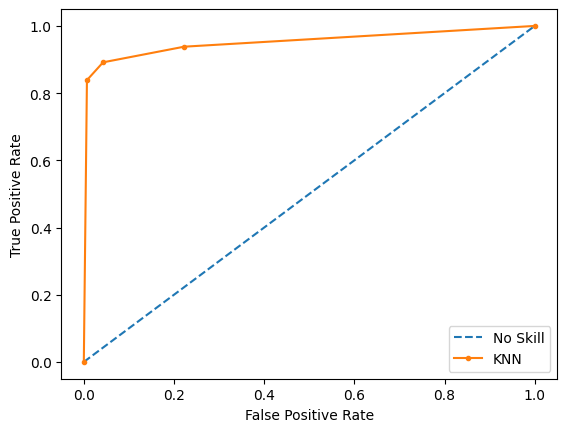

In [27]:
ns_probs = [0 for _ in range(len(y_test))]

probs = knn.predict_proba(X_test)
probs = probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

## Exporting best model - Random Forest as pkl file

In [28]:
import pickle

model_pkl_file = "credit_risk_classifier.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(rf, file)